# Tarea CNN para análisis de flores

## Integrantes
* Jessica Daniela Muñoz Ossa
* Jordy Santiago Bautista Sepulveda
* Ricardo Pulido Renteria

In [1]:
!gdown 1fAMA1xnDDTZO1Xc5s3kdfuTEgDVSn7qk
!gdown 1xe7o34YULxmZvr5QaMt9x0sqHJqE3-Tp
!mkdir Flowers
!unzip 'flowers'
!mv rose Flowers/rose
!mv sunflower Flowers/sunflower
!mv tulip Flowers/tulip

Downloading...
From (original): https://drive.google.com/uc?id=1fAMA1xnDDTZO1Xc5s3kdfuTEgDVSn7qk
From (redirected): https://drive.google.com/uc?id=1fAMA1xnDDTZO1Xc5s3kdfuTEgDVSn7qk&confirm=t&uuid=bc68444e-2231-4722-a891-494b8236b3c7
To: /content/flowers.zip
100% 150M/150M [00:01<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xe7o34YULxmZvr5QaMt9x0sqHJqE3-Tp
To: /content/rose_test.jpeg
100% 270k/270k [00:00<00:00, 23.3MB/s]
Archive:  flowers.zip
   creating: sunflower/
  inflating: sunflower/1008566138_6927679c8a.jpg  
  inflating: sunflower/1022552002_2b93faf9e7_n.jpg  
  inflating: sunflower/1022552036_67d33d5bd8_n.jpg  
  inflating: sunflower/10386503264_e05387e1f7_m.jpg  
  inflating: sunflower/10386522775_4f8c616999_m.jpg  
  inflating: sunflower/10386525005_fd0b7d6c55_n.jpg  
  inflating: sunflower/10386525695_2c38fea555_n.jpg  
  inflating: sunflower/10386540106_1431e73086_m.jpg  
  inflating: sunflower/10386540696_0a95ee53a8_n.jpg  
  inflating: sunflower/1

In [2]:
flower_list = ['rose', 'sunflower', 'tulip']

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K

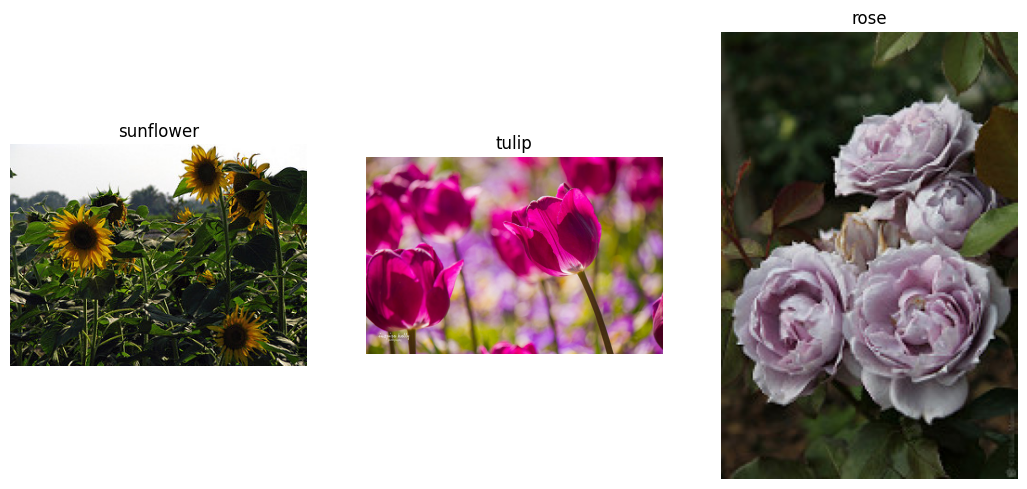

In [4]:
import os
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import load_img

plt.figure(figsize=(13,11))
images=['/content/Flowers/sunflower/'+os.listdir('/content/Flowers/sunflower')[0],
        '/content/Flowers/tulip/'+os.listdir('/content/Flowers/tulip')[0],
        '/content/Flowers/rose/'+os.listdir('/content/Flowers/rose')[0]]
for i,j in enumerate(images):
    image = load_img(j)
    image = img_to_array(image)
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(image.astype('uint8'))
    plt.gca().set_title(j.split(sep='/')[3])

    #plt.ax.title.set_text()
plt.show()

### Augment data

In [22]:
longitude=124
height = 124
channels= 3
epochs = 10
batch_size = 128 # 16 -> 160 -> 128
n_classes = 3

tf.random.set_seed(221)
tipo="categorical"

In [6]:
import sys
sys.path.append('/content/Flowers')

In [7]:
import os
path_base = os.getcwd()
data_base= path_base+'/Flowers'
data_base

'/content/Flowers'

In [8]:
# create image data augmentation generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=[0.5, 1.5],
    rotation_range=40,
    brightness_range=[0.1, 0.9],
    channel_shift_range=150.0,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.3,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    data_base,
    target_size=(height, longitude),
    batch_size=batch_size,
    class_mode=tipo,
    subset='training',
    shuffle=True
)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2
)

validation_generator = validation_datagen.flow_from_directory(
    data_base,
    target_size=(height, longitude),
    class_mode=tipo,
    subset='validation',
    shuffle=False
)

Found 2501 images belonging to 3 classes.
Found 498 images belonging to 3 classes.


In [ ]:
pre_trained_model = VGG16(
    weights = "imagenet",#NULL,#imagenet", Random weight
    include_top = False, #Include_top is set to False, in order to exclude the model's fully-connected layers.
    input_shape = (height, longitude, channels) #default is 150, 150, 3
)

58889256/58889256 [==============================] - 0s 0us/step


### Modelos

A continuación, se crearán 6 modelos. Esto con el fin de hacer una comparativa entre manejar una arquitectura que cuenta solo con VGG16 y una arquitectura propia utilizando 3 optimizadores en cada caso, por un lado usando SGD, por otro RMSprop y finalmente Adam.

#### Modelos solo con VGG16

A continuación, creamos un modelo usando VGG16 cuyo optimizador será SGD

In [ ]:
model_VGG_SGD = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_VGG_SGD.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_max_pooling2d_3 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14716227 (56.14 MB)
Trainable params: 14716227 (56.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fine tunning
i = 0
for layer in pre_trained_model.layers:
    if i < 3 * len(pre_trained_model.layers) // 4:
        layer.trainable = False
    else:
        layer.trainable = True
    i += 1

In [ ]:
model_VGG_SGD.compile(
      optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001, momentum = 0.9),
      loss ='categorical_crossentropy',
      metrics = ["accuracy"])

In [ ]:
VGG_SGD = model_VGG_SGD.fit(
      train_generator,
      steps_per_epoch = train_generator.n // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.n // batch_size
)

Epoch 1/10
39/39 [==============================] - 690s 18s/step - loss: 1.2643 - accuracy: 0.3570 - val_loss: 0.9934 - val_accuracy: 0.4911
Epoch 2/10
39/39 [==============================] - 705s 18s/step - loss: 1.1520 - accuracy: 0.3841 - val_loss: 0.9209 - val_accuracy: 0.6250
Epoch 3/10
39/39 [==============================] - 696s 18s/step - loss: 1.0982 - accuracy: 0.4173 - val_loss: 0.9088 - val_accuracy: 0.6696
Epoch 4/10
39/39 [==============================] - 689s 18s/step - loss: 1.0763 - accuracy: 0.4304 - val_loss: 0.8144 - val_accuracy: 0.7634
Epoch 5/10
39/39 [==============================] - 722s 19s/step - loss: 1.0434 - accuracy: 0.4597 - val_loss: 0.8089 - val_accuracy: 0.7634
Epoch 6/10
39/39 [==============================] - 706s 18s/step - loss: 1.0225 - accuracy: 0.4783 - val_loss: 0.7610 - val_accuracy: 0.7723
Epoch 7/10
39/39 [==============================] - 690s 18s/step - loss: 1.0037 - accuracy: 0.4949 - val_loss: 0.7115 - val_accuracy: 0.7946
Epoch 

Ahora, creamos el modelo con el optimizador de RMSprop

In [ ]:
pre_trained_model = VGG16(
    weights = "imagenet",#NULL,#imagenet", Random weight
    include_top = False, #Include_top is set to False, in order to exclude the model's fully-connected layers.
    input_shape = (height, longitude, channels) #default is 150, 150, 3
)

In [ ]:
model_VGG_RMS = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_VGG_RMS.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 14716227 (56.14 MB)
Trainable params: 14716227 (56.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fine tunning
i = 0
for layer in pre_trained_model.layers:
    if i < 3 * len(pre_trained_model.layers) // 4:
        layer.trainable = False
    else:
        layer.trainable = True
    i += 1

In [ ]:
model_VGG_RMS.compile(
      optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate = 0.0001, momentum = 0.9),
      loss ='categorical_crossentropy',
      metrics = ["accuracy"])

In [ ]:
VGG_RMS = model_VGG_RMS.fit(
      train_generator,
      steps_per_epoch = train_generator.n // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.n // batch_size
)

Epoch 1/10
19/19 [==============================] - 567s 30s/step - loss: 1.1795 - accuracy: 0.3860 - val_loss: 1.0883 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 544s 29s/step - loss: 1.0737 - accuracy: 0.4303 - val_loss: 1.0382 - val_accuracy: 0.1250
Epoch 3/10
19/19 [==============================] - 525s 28s/step - loss: 1.0259 - accuracy: 0.4539 - val_loss: 1.1128 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 526s 28s/step - loss: 1.0205 - accuracy: 0.4530 - val_loss: 1.0783 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 527s 28s/step - loss: 0.9895 - accuracy: 0.4855 - val_loss: 1.1234 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 532s 28s/step - loss: 0.9093 - accuracy: 0.5352 - val_loss: 1.0660 - val_accuracy: 0.2083
Epoch 7/10
19/19 [==============================] - 533s 28s/step - loss: 0.8713 - accuracy: 0.5445 - val_loss: 1.2984 - val_accurac

Finalmente, se crea nuestro modelo con el optimizador de Adam

In [17]:
pre_trained_model = VGG16(
    weights = "imagenet",#NULL,#imagenet", Random weight
    include_top = False, #Include_top is set to False, in order to exclude the model's fully-connected layers.
    input_shape = (height, longitude, channels) #default is 150, 150, 3
)

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
model_VGG_Adam = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_VGG_Adam.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14716227 (56.14 MB)
Trainable params: 14716227 (56.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Fine tunning
i = 0
for layer in pre_trained_model.layers:
    if i < 3 * len(pre_trained_model.layers) // 4:
        layer.trainable = False
    else:
        layer.trainable = True
    i += 1

In [20]:
model_VGG_Adam.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
      loss ='categorical_crossentropy',
      metrics = ["accuracy"])

In [23]:
VGG_Adam = model_VGG_Adam.fit(
      train_generator,
      steps_per_epoch = train_generator.n // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.n // batch_size
)

Epoch 1/10
19/19 [==============================] - 459s 24s/step - loss: 1.1702 - accuracy: 0.3936 - val_loss: 0.4639 - val_accuracy: 0.8750
Epoch 2/10
19/19 [==============================] - 442s 23s/step - loss: 0.9685 - accuracy: 0.5352 - val_loss: 0.4260 - val_accuracy: 0.8021
Epoch 3/10
19/19 [==============================] - 434s 23s/step - loss: 0.8258 - accuracy: 0.6195 - val_loss: 0.5030 - val_accuracy: 0.7812
Epoch 4/10
19/19 [==============================] - 440s 23s/step - loss: 0.7956 - accuracy: 0.6262 - val_loss: 0.3449 - val_accuracy: 0.8438
Epoch 5/10
19/19 [==============================] - 439s 23s/step - loss: 0.7202 - accuracy: 0.6662 - val_loss: 0.3355 - val_accuracy: 0.8438
Epoch 6/10
19/19 [==============================] - 433s 23s/step - loss: 0.6767 - accuracy: 0.6987 - val_loss: 0.3329 - val_accuracy: 0.8646
Epoch 7/10
19/19 [==============================] - 444s 23s/step - loss: 0.6790 - accuracy: 0.6890 - val_loss: 0.4184 - val_accuracy: 0.7604
Epoch 

#### Otra arquitectura

Aquí, se maneja en vez de VGG16 la siguiente arquitectura

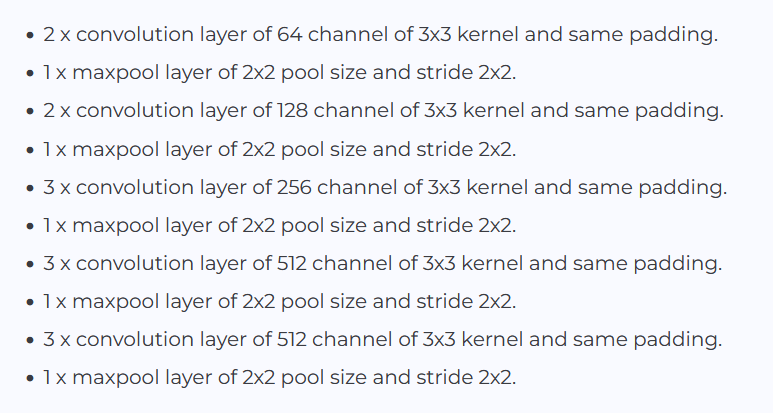

SGD

In [ ]:
model_other_SGD=tf.keras.models.Sequential([
    tf.keras.Input(shape=(124, 124, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(124, 124, 3), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

model_other_SGD.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                   

In [ ]:
model_other_SGD.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics= ["accuracy"]
)

In [ ]:
other_SGD=model_other_SGD.fit(
      train_generator,
      steps_per_epoch = train_generator.n // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.n // batch_size
)

Epoch 1/10
19/19 [==============================] - 1450s 76s/step - loss: 1.0986 - accuracy: 0.3384 - val_loss: 1.0967 - val_accuracy: 0.9792
Epoch 2/10
19/19 [==============================] - 1450s 76s/step - loss: 1.0983 - accuracy: 0.3881 - val_loss: 1.0982 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 1447s 76s/step - loss: 1.0980 - accuracy: 0.3902 - val_loss: 1.0998 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 1452s 78s/step - loss: 1.0977 - accuracy: 0.3953 - val_loss: 1.1010 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 1436s 75s/step - loss: 1.0974 - accuracy: 0.3953 - val_loss: 1.1023 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 1451s 76s/step - loss: 1.0972 - accuracy: 0.3919 - val_loss: 1.1035 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 1436s 75s/step - loss: 1.0969 - accuracy: 0.3932 - val_loss: 1.1045 - 

RMSProp

In [ ]:
model_other_RMSProp=tf.keras.models.Sequential([
    tf.keras.Input(shape=(124, 124, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(124, 124, 3), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

model_other_RMSProp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                   

In [ ]:
model_other_RMSProp.compile(
    optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics= ["accuracy"]
)

In [ ]:
other_RMSProp=model_other_RMSProp.fit(
      train_generator,
      steps_per_epoch = train_generator.n // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.n // batch_size
)

Epoch 1/10
19/19 [==============================] - 996s 52s/step - loss: 1.0930 - accuracy: 0.3860 - val_loss: 1.1565 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 977s 51s/step - loss: 1.0918 - accuracy: 0.3932 - val_loss: 1.1419 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 984s 52s/step - loss: 1.0845 - accuracy: 0.3873 - val_loss: 0.7500 - val_accuracy: 0.5625
Epoch 4/10
19/19 [==============================] - 971s 51s/step - loss: 1.1269 - accuracy: 0.3687 - val_loss: 1.1891 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 968s 51s/step - loss: 1.0916 - accuracy: 0.3953 - val_loss: 1.1844 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 979s 51s/step - loss: 1.0912 - accuracy: 0.3953 - val_loss: 1.1717 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 979s 52s/step - loss: 1.0456 - accuracy: 0.4374 - val_loss: 2.1605 - val_acc

Adam

In [9]:
model_other_Adam=tf.keras.models.Sequential([
    tf.keras.Input(shape=(124, 124, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(124, 124, 3), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),

    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_other_Adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                   

In [10]:
model_other_Adam.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics= ["accuracy"]
)

In [11]:
other_Adam=model_other_Adam.fit(
      train_generator,
      steps_per_epoch = train_generator.n // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.n // batch_size
)

Epoch 1/10
19/19 [==============================] - 1332s 70s/step - loss: 1.0941 - accuracy: 0.3882 - val_loss: 1.1574 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 1316s 69s/step - loss: 1.0419 - accuracy: 0.3869 - val_loss: 0.6905 - val_accuracy: 0.6771
Epoch 3/10
19/19 [==============================] - 1332s 70s/step - loss: 0.9771 - accuracy: 0.4840 - val_loss: 1.2158 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 1318s 69s/step - loss: 0.9019 - accuracy: 0.5445 - val_loss: 0.9078 - val_accuracy: 0.7083
Epoch 5/10
19/19 [==============================] - 1325s 70s/step - loss: 0.8713 - accuracy: 0.5554 - val_loss: 1.1838 - val_accuracy: 0.2708
Epoch 6/10
19/19 [==============================] - 1321s 69s/step - loss: 0.8638 - accuracy: 0.5563 - val_loss: 1.1677 - val_accuracy: 0.0729
Epoch 7/10
19/19 [==============================] - 1290s 68s/step - loss: 0.8549 - accuracy: 0.5651 - val_loss: 1.1024 - val_accuracy

### Comparación entre los modelos

Una vez entrenados, vamos a generar los gráficos para ver su precisión y pérdida

**Optimizados con SGD**

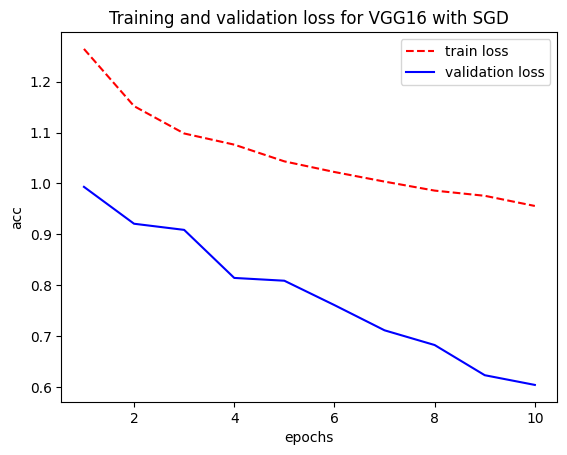

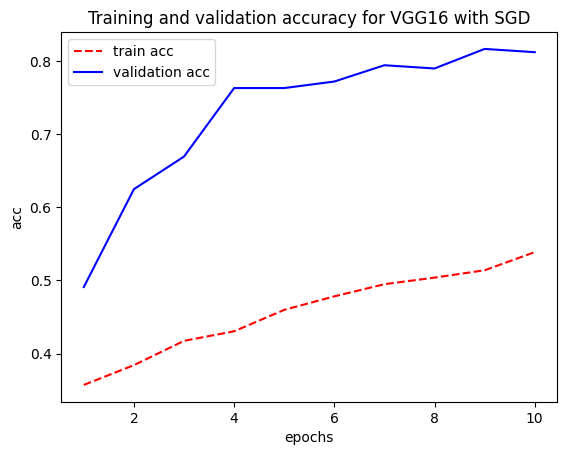

In [ ]:
VGG_SGD_dict = VGG_SGD.history

acc      = VGG_SGD.history['accuracy']
val_acc  = VGG_SGD.history['val_accuracy']
loss     = VGG_SGD.history['loss']
val_loss = VGG_SGD.history['val_loss']

epochs   = range(1, len(acc) + 1, 1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy for VGG16 with SGD')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss for VGG16 with SGD')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

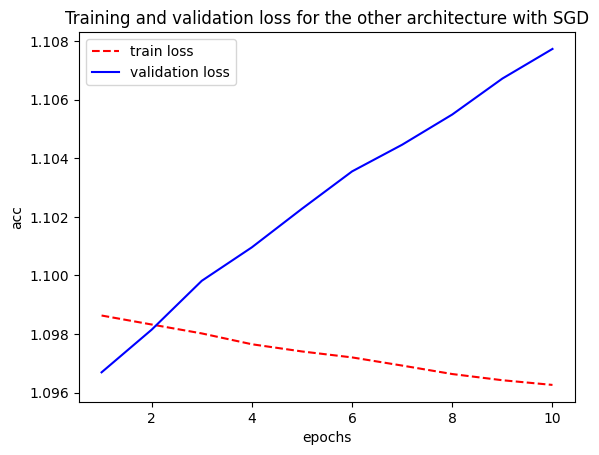

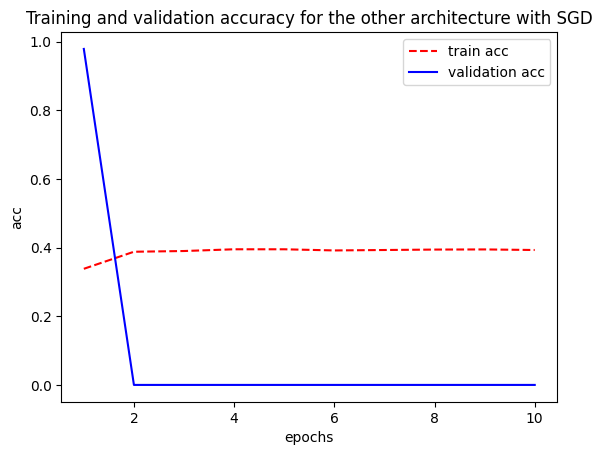

In [ ]:
other_SGD_dict=other_SGD.history

acc = other_SGD.history['accuracy']
val_acc = other_SGD.history['val_accuracy']
loss = other_SGD.history['loss']
val_loss = other_SGD.history['val_loss']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy for the other architecture with SGD')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss for the other architecture with SGD')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

**Optimizados con RMSprop**

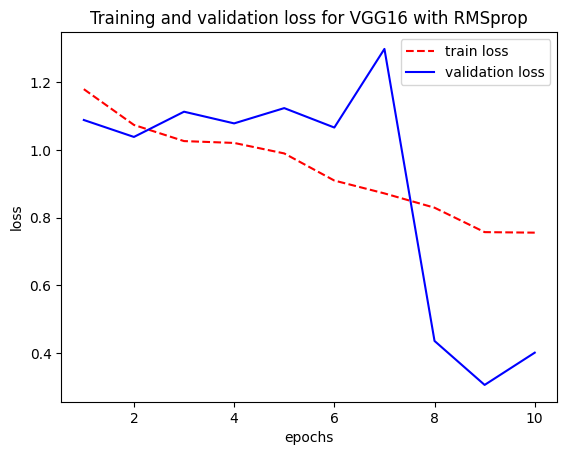

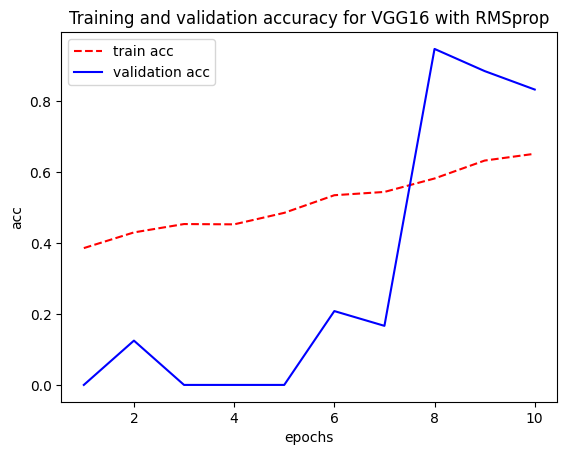

In [ ]:
VGG_RMS_dict = VGG_RMS.history

acc      = VGG_RMS.history[ 'accuracy']
val_acc  = VGG_RMS.history['val_accuracy']
loss     = VGG_RMS.history[    'loss' ]
val_loss = VGG_RMS.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy for VGG16 with RMSprop')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss for VGG16 with RMSprop')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

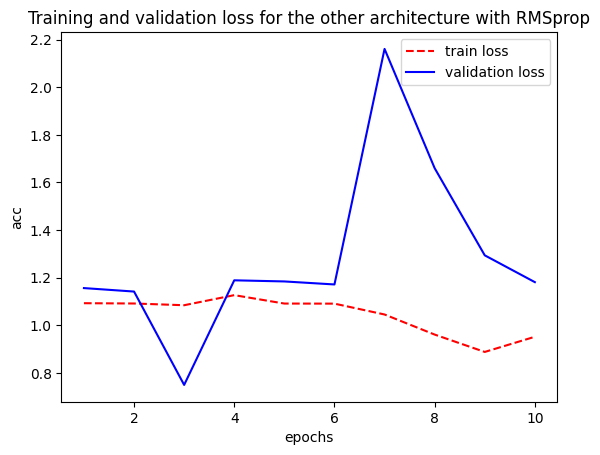

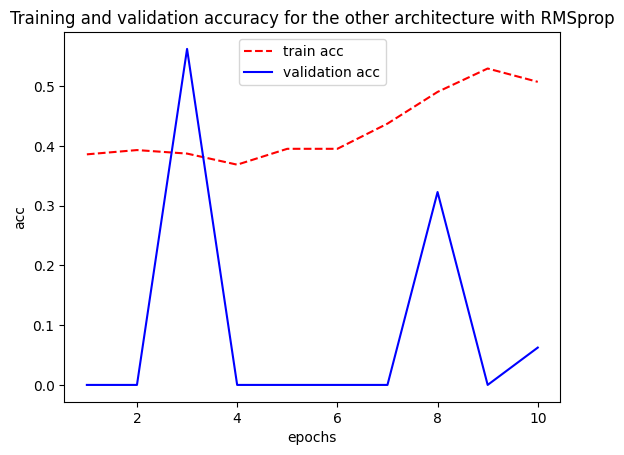

In [ ]:
other_RMSProp_dict=other_RMSProp.history

acc = other_RMSProp.history['accuracy']
val_acc = other_RMSProp.history['val_accuracy']
loss = other_RMSProp.history['loss']
val_loss = other_RMSProp.history['val_loss']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy for the other architecture with RMSprop')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss for the other architecture with RMSprop')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

**Optimizados con Adam**

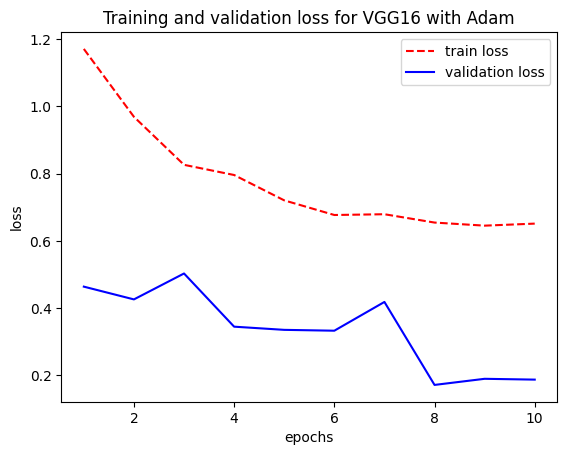

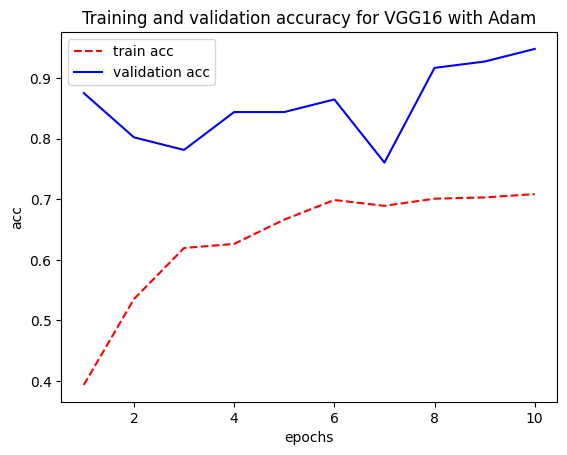

In [24]:
VGG_Adam_dict = VGG_Adam.history

acc      = VGG_Adam.history[ 'accuracy']
val_acc  = VGG_Adam.history['val_accuracy']
loss     = VGG_Adam.history[    'loss' ]
val_loss = VGG_Adam.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy for VGG16 with Adam')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss for VGG16 with Adam')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

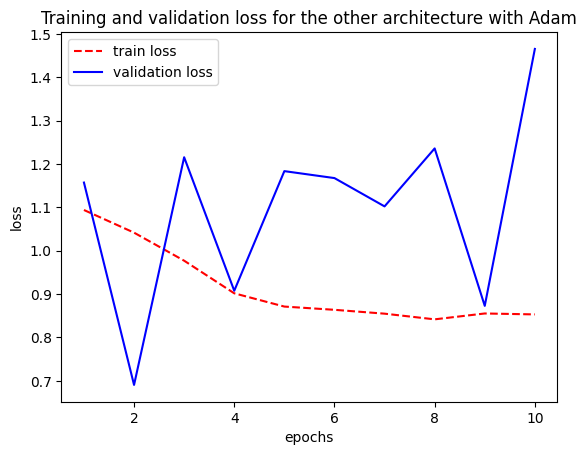

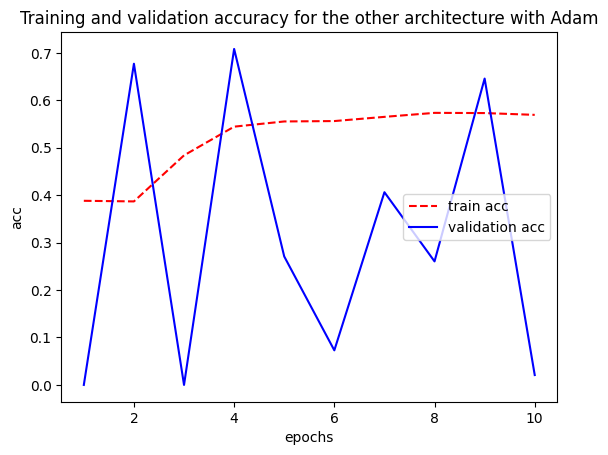

In [13]:
other_Adam_dict=other_Adam.history

acc = other_Adam.history['accuracy']
val_acc = other_Adam.history['val_accuracy']
loss = other_Adam.history['loss']
val_loss = other_Adam.history['val_loss']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy for the other architecture with Adam')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend(['train acc','validation acc'])
plt.figure(0)

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss for the other architecture with Adam')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train loss','validation loss'])
plt.figure(1)

plt.show()

### Evaluación de modelos

Para evaluar nuestros modelos, los probaremos con una imagen de una rosa y veremos la precisión con la que esta fue clasificada

In [15]:
# Preparamos la imagen para la prueba
from tensorflow.keras.preprocessing import image

img_path = './rose_test.jpeg'
img = image.load_img(img_path, target_size=(height, longitude))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

Evaluación con SGD:

In [ ]:
test_lost, test_acc= model_VGG_SGD.evaluate(validation_generator)
print ("Test Accuracy:", test_acc)

predictions = model_VGG_SGD.predict(img_array)
scoreS1 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(flower_list[np.argmax(scoreS1)], 100 * np.max(scoreS1))
)

32/32 [==============================] - 113s 4s/step - loss: 0.7185 - accuracy: 0.7087
Test Accuracy: 0.7087087035179138
1/1 [==============================] - 0s 181ms/step
This image most likely belongs to rose with a 57.61 percent confidence.


In [ ]:
test_lost, test_acc= model_other_SGD.evaluate(validation_generator)
print ("Test Accuracy:", test_acc)

predictions = model_other_SGD.predict(img_array)
scoreS2 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(flower_list[np.argmax(scoreS2)], 100 * np.max(scoreS2))
)

16/16 [==============================] - 84s 5s/step - loss: 1.0960 - accuracy: 0.3936
Test Accuracy: 0.3935742974281311
1/1 [==============================] - 0s 339ms/step
This image most likely belongs to rose with a 43.83 percent confidence.


Evaluación con RMSprop:

In [ ]:
test_lost, test_acc= model_VGG_RMS.evaluate(validation_generator)
print ("Test Accuracy:", test_acc)

predictions = model_VGG_RMS.predict(img_array)
scoreR1 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(flower_list[np.argmax(scoreR1)], 100 * np.max(scoreR1))
)

16/16 [==============================] - 88s 5s/step - loss: 0.4526 - accuracy: 0.8032
Test Accuracy: 0.8032128810882568
1/1 [==============================] - 0s 384ms/step
This image most likely belongs to rose with a 57.61 percent confidence.


In [ ]:
test_lost, test_acc= model_other_RMSProp.evaluate(validation_generator)
print ("Test Accuracy:", test_acc)

predictions = model_other_RMSProp.predict(img_array)
scoreR2 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(flower_list[np.argmax(scoreR2)], 100 * np.max(scoreR2))
)

16/16 [==============================] - 55s 3s/step - loss: 0.8789 - accuracy: 0.5964
Test Accuracy: 0.5963855385780334
1/1 [==============================] - 0s 271ms/step
This image most likely belongs to rose with a 57.61 percent confidence.


Evaluación con Adam:

In [29]:
test_lost, test_acc= model_VGG_Adam.evaluate(validation_generator)
print ("Test Accuracy:", test_acc)

predictions = model_VGG_Adam.predict(img_array)
scoreA1 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(flower_list[np.argmax(scoreA1)], 100 * np.max(scoreA1))
)

16/16 [==============================] - 72s 4s/step - loss: 0.4010 - accuracy: 0.8514
Test Accuracy: 0.8514056205749512
1/1 [==============================] - 0s 179ms/step
This image most likely belongs to rose with a 57.61 percent confidence.


In [30]:
test_lost, test_acc= model_other_Adam.evaluate(validation_generator)
print ("Test Accuracy:", test_acc)

predictions = model_other_Adam.predict(img_array)
scoreA2 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(flower_list[np.argmax(scoreA2)], 100 * np.max(scoreA2))
)

16/16 [==============================] - 74s 5s/step - loss: 0.9312 - accuracy: 0.5924
Test Accuracy: 0.5923694968223572
1/1 [==============================] - 0s 154ms/step
This image most likely belongs to tulip with a 57.61 percent confidence.
